# بار گذاری دیتاست

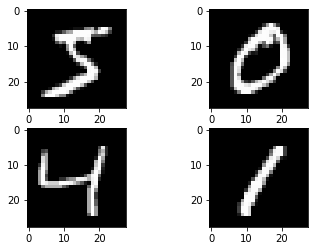

In [2]:
#ترسیم نمونه هایی از دیتاست
from keras.datasets import mnist
import matplotlib.pyplot as plt
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# ترسیم 4 عکس از دیتاست با مقیاس خاکستری
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap( 'gray' ))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap( 'gray' ))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap( 'gray' ))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap( 'gray' ))
# show the plot
plt.show()

In [3]:
#مدل base line با MLP
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [4]:

seed = 7
numpy.random.seed(seed)

In [11]:
X_test.shape[0]

10000

In [6]:
# تبدیل ابعاد 28 در 28 عکس به یک بردار با 784 درایه برای هر عکس
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype( 'float32' )

In [7]:
# نرمالسازی ورودی ها از بازه 0 تا 255 به 0 تا 1
X_train = X_train / 255
X_test = X_test / 255

In [8]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [12]:
# توصیف مدل
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer= 'normal' , activation= 'relu' ))
    model.add(Dense(num_classes, kernel_initializer= 'normal' , activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
    return model

In [13]:
# ساخت مدل
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
            verbose=2)

C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
  """
C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`
  
C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """



Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.2782 - accuracy: 0.9211 - val_loss: 0.1413 - val_accuracy: 0.9574
Epoch 2/10
 - 9s - loss: 0.1115 - accuracy: 0.9677 - val_loss: 0.0923 - val_accuracy: 0.9710
Epoch 3/10
 - 11s - loss: 0.0717 - accuracy: 0.9796 - val_loss: 0.0787 - val_accuracy: 0.9768
Epoch 4/10
 - 9s - loss: 0.0503 - accuracy: 0.9857 - val_loss: 0.0748 - val_accuracy: 0.9771
Epoch 5/10
 - 9s - loss: 0.0372 - accuracy: 0.9892 - val_loss: 0.0684 - val_accuracy: 0.9787
Epoch 6/10
 - 9s - loss: 0.0269 - accuracy: 0.9925 - val_loss: 0.0628 - val_accuracy: 0.9810
Epoch 7/10
 - 10s - loss: 0.0211 - accuracy: 0.9945 - val_loss: 0.0627 - val_accuracy: 0.9812
Epoch 8/10
 - 11s - loss: 0.0140 - accuracy: 0.9970 - val_loss: 0.0638 - val_accuracy: 0.9798
Epoch 9/10
 - 9s - loss: 0.0108 - accuracy: 0.9978 - val_loss: 0.0588 - val_accuracy: 0.9812
Epoch 10/10
 - 11s - loss: 0.0077 - accuracy: 0.9987 - val_loss: 0.0573 - val_accuracy: 0.9819


In [15]:
# ارزیابی نهایی مدل
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.19%


# پردازش تصاویر با استفاده از شبکهای عصبی کانولوشنالی

In [36]:
# تعریف یک مدل CNN ساده
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [37]:
# بارگذاری دیتاست
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# تغییر شکل به تعداد نمونه ها، تعداد کانال، عرض و طول
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype( 'float32' )
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype( 'float32' )

In [38]:
# نرمالسازی ورودی ها از بازه 0 تا 255 به 0 تا 1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

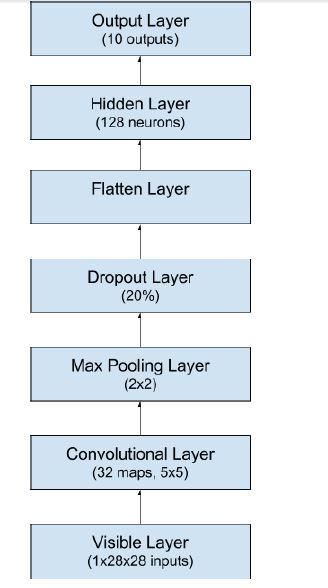

In [15]:
from IPython.display import Image
Image("C:\\Users\\ShahinN\\Desktop\\CNN.JPG")

توضیحات:

اولین لایه پنهان، یک لایه کانولوشنالی با 32 نقشه ویژگی به ابعاد 5 در 5 است و لایه آشکار با ورودی هایی با ابعاد بالا نیز در آن تعریف میشوند

در لایه بعدی، یک لایه تجمعی با مقدار ماکزیمم تعریف میکنیم که دارای ابعاد 2 در 2 هست.

در لایه بعد، یک لایه دراپ اوت تحت عنوان لایه نظم دهی تعریف میکنیم که  20 درصد از نورون ها را در
هر چرخه از بروز رسانی حذف میکند. 

در مرحله بعد، یک لایه دیتای ماتریس دو بعدی را به یک بردار  به نام فلاتن تبدیل میکند. این بردار باعث میشود که خروجی
توسط لایه های تمام متصل پردازش شوند. 

بعد از یک لایه پنهان با 128 نورون استفاده میشود

در نهایت لایه خروجی با 10 نورون و تابع فعال سازی سافتمکس

In [41]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format='channels_first'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation= 'relu' ))
    model.add(Dense(num_classes, activation= 'softmax' ))
    # Compile model
    model.compile(loss= 'categorical_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
    return model

In [42]:
# build the model
model = baseline_model()


In [43]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200,
verbose=2)

C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 175s - loss: 0.2814 - accuracy: 0.9182 - val_loss: 0.1036 - val_accuracy: 0.9690
Epoch 2/10
 - 174s - loss: 0.0962 - accuracy: 0.9720 - val_loss: 0.0685 - val_accuracy: 0.9790
Epoch 3/10
 - 163s - loss: 0.0646 - accuracy: 0.9804 - val_loss: 0.0573 - val_accuracy: 0.9818
Epoch 4/10
 - 180s - loss: 0.0518 - accuracy: 0.9841 - val_loss: 0.0536 - val_accuracy: 0.9829
Epoch 5/10
 - 175s - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.0493 - val_accuracy: 0.9839
Epoch 6/10
 - 148s - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0394 - val_accuracy: 0.9863
Epoch 7/10
 - 174s - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0385 - val_accuracy: 0.9865
Epoch 8/10
 - 148s - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0457 - val_accuracy: 0.9845
Epoch 9/10
 - 140s - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0417 - val_accuracy: 0.9863
Epoch 10/10
 - 140s - loss: 0.0172 - accuracy: 0.9946 - val_loss: 0.0418 - val_accuracy: 0.9855